In [1]:
# explore the clustering options on the underlying data

In [120]:
# packages
import os
from datetime import datetime
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [127]:
%matplotlib notebook



In [69]:
# data
df = pd.read_csv("data/UnAppIt1_31610.csv", index_col = 0)

In [70]:
df

,subjectValue,appSessionId,TimeDiff,back_forward,changeUrl,click,hideAppWindow,loadPage,navigate,reload,rightClick,showAppWindow
0,502640,31e37024-d35d-40d2-ba3d-1060d6313d4c,5,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
1,502640,54b53855-2d27-4af4-b4d8-92439b8c1867,173,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,502640,8b633130-50f4-434c-a7c1-8145c601a570,4969,1.0,13.0,30.0,24.0,0.0,1.0,0.0,0.0,23.0
3,502640,01f4406e-b221-441f-ae99-169798f3c670,235,0.0,13.0,21.0,3.0,0.0,2.0,0.0,0.0,3.0
4,502640,09562a2a-dd34-406d-b03c-8c171202491d,792,0.0,4.0,15.0,9.0,0.0,2.0,1.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63299,9962782,bfe2401b-3ebd-4e67-9462-a66f4c96b75d,1964,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
63300,9962782,c52e3a69-6f03-40ad-bcc6-59ea4e379e4a,17,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0
63301,9962782,c8ef006d-09b4-4a47-975f-3eec92afc25f,236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
63302,9962782,ccd33a09-2e76-4d34-ba5d-86778e0efa78,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [71]:
# first hypothesis/iteration... we look at individual sessions... 

In [72]:
# select the subset of numeric columns
df_num = df.loc[:,["TimeDiff", "back_forward","changeUrl","click","hideAppWindow","loadPage","navigate","reload","rightClick","showAppWindow"]]

In [73]:
df_num

,TimeDiff,back_forward,changeUrl,click,hideAppWindow,loadPage,navigate,reload,rightClick,showAppWindow
0,5,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
1,173,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4969,1.0,13.0,30.0,24.0,0.0,1.0,0.0,0.0,23.0
3,235,0.0,13.0,21.0,3.0,0.0,2.0,0.0,0.0,3.0
4,792,0.0,4.0,15.0,9.0,0.0,2.0,1.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...
63299,1964,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
63300,17,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0
63301,236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
63302,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [84]:
# start simple... we look at session time and num of important events 
df_num["ImportantEvents"] = df_num.apply(lambda row: row['changeUrl'] + row["click"] + row["rightClick"], axis = 1)

In [87]:
df_num = df_num.loc[:,["TimeDiff", "ImportantEvents"]]

In [89]:
scalar = StandardScaler()

In [90]:
scalar.fit(df_num)

StandardScaler()

In [91]:
df_scale = scalar.transform(df_num)

In [92]:
pd.DataFrame(df_num)

,TimeDiff,ImportantEvents
0,5,3.0
1,173,0.0
2,4969,43.0
3,235,34.0
4,792,19.0
...,...,...
63299,1964,0.0
63300,17,5.0
63301,236,0.0
63302,2,0.0


In [107]:
df_scale = pd.DataFrame(df_scale)
df_scale

,0,1
0,-0.608648,-0.296435
1,-0.534652,-0.322064
2,1.577778,0.045284
3,-0.507343,-0.031603
4,-0.262009,-0.159747
...,...,...
63299,0.254206,-0.322064
63300,-0.603363,-0.279349
63301,-0.506903,-0.322064
63302,-0.609970,-0.322064


In [108]:
kmeans = KMeans(init="random", n_clusters=5, n_init=4, random_state=0)

In [109]:
kmeans.fit(df_scale)

KMeans(init='random', n_clusters=5, n_init=4, random_state=0)

In [110]:
kmeans.cluster_centers_

array([[-0.44905204, -0.23128909],
       [ 6.63069483, 40.2393294 ],
       [ 0.66417795,  0.18826125],
       [ 4.83387656,  6.41943165],
       [ 2.49976979,  1.27347764]])

In [111]:
timeDiffMean = np.mean(df_num.TimeDiff)
timeDiffStd = np.std(df_num.TimeDiff)

importantEventsMean = np.mean(df_num.ImportantEvents)
importantEventsStd = np.std(df_num.ImportantEvents)

In [112]:
timeDiffMean

1386.8577341084292

In [101]:
timeDiffStd

2270.371757357118

In [118]:
timeDiff = (df_scale[0] * timeDiffStd + timeDiffMean)
importantEvents = (df_scale[1] * importantEventsStd + importantEventsMean)

In [122]:
kmeans.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [123]:
df_final = pd.DataFrame({
    "SessionTime": timeDiff,
    "EventCount": importantEvents,
    "ClusterLabel": kmeans.labels_
})

In [ ]:
plt.scatter(df_final["SessionTime"], df_final["EventCount"], c = df_final["ClusterLabel"],
           )
plt.xlabel("SessionTime")
plt.ylabel("EventCount")
plt.show()

In [138]:
cluster_centers = pd.DataFrame({
    "SessionTimeCenter": kmeans.cluster_centers_[:,0] * timeDiffStd + timeDiffMean,
    "EventCountCenter" : kmeans.cluster_centers_[:,1] * importantEventsStd + importantEventsMean
})

In [139]:
cluster_centers

,SessionTimeCenter,EventCountCenter
0,367.342672,10.625648
1,16441.000000,4747.923077
2,2894.788596,59.736208
3,12361.554545,789.127273
4,7062.264472,186.766459


# ok... now. More structured approach...

In [179]:
clu_num = 5

In [180]:
# data
df = pd.read_csv("data/UnAppIt1_31610.csv", index_col = 0)

In [181]:
df_num = df.loc[:,["TimeDiff", "back_forward","changeUrl","click",
                   "hideAppWindow","loadPage","navigate",
                   "reload","rightClick","showAppWindow"]]
df_num["ImportantEvents"] = df_num.apply(lambda row: row['changeUrl'] + row["click"] + row["rightClick"], axis = 1)
df_num = df_num.loc[:,["TimeDiff", "ImportantEvents"]]

In [182]:
scalar = StandardScaler()
scalar.fit(df_num)
df_scale = scalar.transform(df_num)

In [183]:
kmeans = KMeans(init="random", n_clusters=clu_num, n_init=4, random_state=0)
kmeans.fit(df_scale)

KMeans(init='random', n_clusters=5, n_init=4, random_state=0)

In [184]:
timeDiffMean = np.mean(df_num.TimeDiff)
timeDiffStd = np.std(df_num.TimeDiff)

importantEventsMean = np.mean(df_num.ImportantEvents)
importantEventsStd = np.std(df_num.ImportantEvents)

<IPython.core.display.Javascript object>


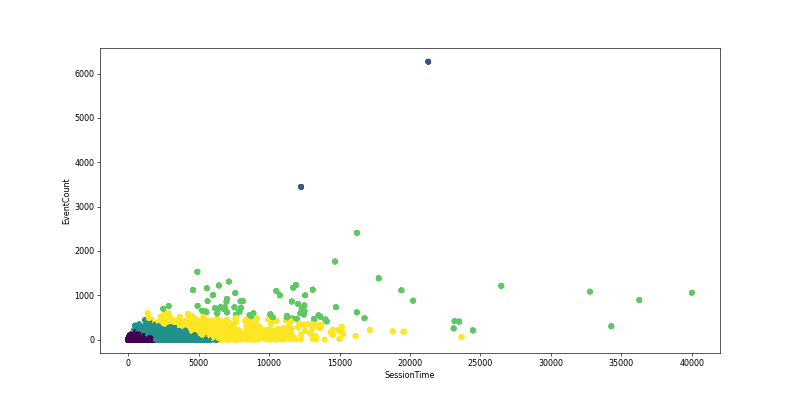

In [185]:
df_final = pd.DataFrame({
    "SessionTime": timeDiff,
    "EventCount": importantEvents,
    "ClusterLabel": kmeans.labels_
})
plt.scatter(df_final["SessionTime"], df_final["EventCount"], c = df_final["ClusterLabel"],
           )
plt.xlabel("SessionTime")
plt.ylabel("EventCount")
plt.show()

In [172]:
cluster_centers = pd.DataFrame({
    "SessionTimeCenter": kmeans.cluster_centers_[:,0] * timeDiffStd + timeDiffMean,
    "EventCountCenter" : kmeans.cluster_centers_[:,1] * importantEventsStd + importantEventsMean
})
cluster_centers

,SessionTimeCenter,EventCountCenter
0,246.023367,9.016990
1,16441.000000,4747.923077
2,2214.342772,153.625633
3,13317.326316,1096.710526
4,5437.887111,383.766222
5,5579.477654,69.512104
6,12483.594901,230.522663
7,2208.847686,26.271259


In [178]:
df[(df.TimeDiff > 0) & (df.TimeDiff <= 5)]

,subjectValue,appSessionId,TimeDiff,back_forward,changeUrl,click,hideAppWindow,loadPage,navigate,reload,rightClick,showAppWindow
0,502640,31e37024-d35d-40d2-ba3d-1060d6313d4c,5,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
8,502640,31e37024-d35d-40d2-ba3d-1060d6313d4c,5,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
32,502640,31e37024-d35d-40d2-ba3d-1060d6313d4c,5,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
37,502640,44b6e42f-ecc7-4d76-b0cf-af3cb0781f62,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
55,502640,0b497ec8-f660-48ad-b53b-2e2998b683b3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63253,9744475,cc234769-8ead-48e5-ae74-55067336128f,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
63285,9962782,bf6412e4-325f-4d68-b434-698f1914b4ba,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
63289,9962782,ccd33a09-2e76-4d34-ba5d-86778e0efa78,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
63298,9962782,bf6412e4-325f-4d68-b434-698f1914b4ba,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
